# Banking marketing classification

In [18]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [19]:
missingVal = ["n/a","na","--"]

csvPath = os.path.join(os.getcwd(),"bank_marketing","dataset","bank-additional.csv")
bankDF = pd.read_csv(csvPath, sep=';', index_col=None, na_values=missingVal)

# bankDF.reset_index(drop=True, inplace=True)

print(bankDF.head())

header = bankDF.columns
# print(header)

print("shape = ", bankDF.shape)

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [20]:
bankDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [21]:
# describe df numerical columns
bankDF.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### checking on data 

In [28]:
#check unique size for each columns
print("== check unique size == \n ")
for column in bankDF.columns:
    print("category '{0}': \b {1:2.2f}  ".format(column, bankDF[column].unique().size))

== check unique size == 
 
category 'age':  67.00  
category 'job':  12.00  
category 'marital':  4.00  
category 'education':  8.00  
category 'default':  3.00  
category 'housing':  3.00  
category 'loan':  3.00  
category 'contact':  2.00  
category 'month':  10.00  
category 'day_of_week':  5.00  
category 'duration':  828.00  
category 'campaign':  25.00  
category 'pdays':  21.00  
category 'previous':  7.00  
category 'poutcome':  3.00  
category 'emp.var.rate':  10.00  
category 'cons.price.idx':  26.00  
category 'cons.conf.idx':  26.00  
category 'euribor3m':  234.00  
category 'nr.employed':  11.00  
category 'y':  2.00  


In [29]:
#check unique element for each columns
print("check unique element\n")
for column in bankDF.columns:
    print(" category '{0}': {1} \n ".format(column, bankDF[column].unique()))
        

check unique element

 category 'age': [30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70] 
 
 category 'job': ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown'] 
 
 category 'marital': ['married' 'single' 'divorced' 'unknown'] 
 
 category 'education': ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate'] 
 
 category 'default': ['no' 'unknown' 'yes'] 
 
 category 'housing': ['yes' 'no' 'unknown'] 
 
 category 'loan': ['no' 'unknown' 'yes'] 
 
 category 'contact': ['cellular' 'telephone'] 
 
 category 'month': ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec'] 
 
 category 'day_of_week': ['fri' 'wed' 'mon' 'thu' 'tue'] 
 
 category 'duration': [ 487  346  227   17   

## Data Imputation

In [22]:
#explore
bankDF.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### drop column with >=25% missing value

In [23]:
 bankDF.isnull().sum()/len(bankDF)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [24]:
# #drop data with >25% missing data
# bankDF.drop('',inplace = True, axis=1)

### median imputation 

In [25]:
#  nullColumn = bankDF.columns[bankDF.isna().any()].tolist()

In [26]:
# for col in nullColumn:
#     colMean = bankDF[col].mean()
#     bankDF[col].fillna(colMean, inplace=True)

In [27]:
# bankDF.isna().any()

### preprocess on categorical non-numerical value

In [30]:
#retrieve categorical string type columns
cate_features = []
for column in bankDF.columns:
    typeData = str(bankDF[column].dtypes)
    if ("int" not in typeData) and ("float" not in typeData):
        cate_features.append(column)
print(cate_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


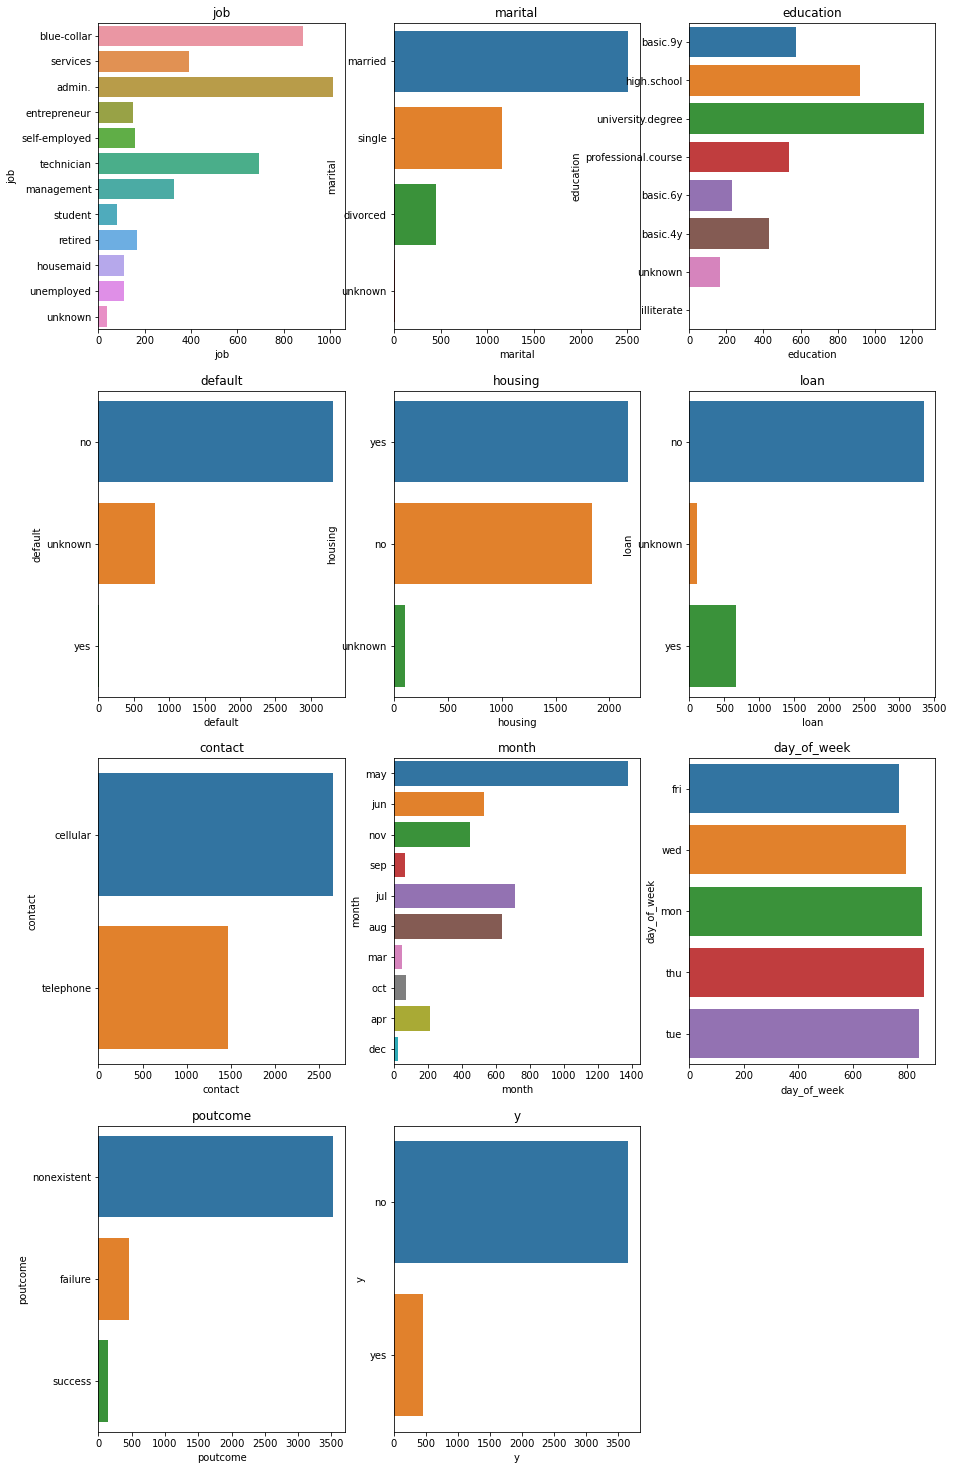

In [31]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in cate_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bankDF)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [32]:
#check unique size for each columns
print("== check unique size == \n ")
for column in cate_features:
    print("category '{0}': \b {1:2.2f}  ".format(column, bankDF[column].unique().size))

== check unique size == 
 
category 'job':  12.00  
category 'marital':  4.00  
category 'education':  8.00  
category 'default':  3.00  
category 'housing':  3.00  
category 'loan':  3.00  
category 'contact':  2.00  
category 'month':  10.00  
category 'day_of_week':  5.00  
category 'poutcome':  3.00  
category 'y':  2.00  


In [33]:
#create dictionary for categorical value mapping
print("categorical\n")


catDict = dict()
le = LabelEncoder()

for column in cate_features:
    if ("int" not in str(bankDF[column].dtypes)) and ("float" not in str(bankDF[column].dtypes)):
        bankDF[column] = le.fit_transform(bankDF[column])
        catDict[column] = list(le.inverse_transform(list(bankDF[column].unique())))

for key in catDict:
    print(key)
    print(bankDF[key].unique())
    print(catDict[key])


categorical

job
[ 1  7  0  2  6  9  4  8  5  3 10 11]
['blue-collar', 'services', 'admin.', 'entrepreneur', 'self-employed', 'technician', 'management', 'student', 'retired', 'housemaid', 'unemployed', 'unknown']
marital
[1 2 0 3]
['married', 'single', 'divorced', 'unknown']
education
[2 3 6 5 1 0 7 4]
['basic.9y', 'high.school', 'university.degree', 'professional.course', 'basic.6y', 'basic.4y', 'unknown', 'illiterate']
default
[0 1 2]
['no', 'unknown', 'yes']
housing
[2 0 1]
['yes', 'no', 'unknown']
loan
[0 1 2]
['no', 'unknown', 'yes']
contact
[0 1]
['cellular', 'telephone']
month
[6 4 7 9 3 1 5 8 0 2]
['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr', 'dec']
day_of_week
[0 4 1 2 3]
['fri', 'wed', 'mon', 'thu', 'tue']
poutcome
[1 0 2]
['nonexistent', 'failure', 'success']
y
[0 1]
['no', 'yes']


In [35]:
bankDF.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [39]:
bankDF.iloc[2]

age                        25
job                  services
marital               married
education         high.school
default                    no
housing                   yes
loan                       no
contact             telephone
month                     jun
day_of_week               wed
duration                  227
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.4
cons.price.idx         94.465
cons.conf.idx           -41.8
euribor3m               4.962
nr.employed            5228.1
y                          no
Name: 2, dtype: object

In [213]:
# Spliting target variable and independent variables
bank_y = bankDF['y']
bank_x = bankDF.drop(['y'], axis = 1)

## Data with null / missing 

In [214]:
missDF = bankDF.copy()

for col in missDF.columns:
    if col != "y":
        missDF.loc[missDF.sample(frac=0.1).index, col] = pd.np.nan

In [215]:
#explore
missDF.isnull().sum()

age               412
job               412
marital           412
education         412
default           412
housing           412
loan              412
contact           412
month             412
day_of_week       412
duration          412
campaign          412
pdays             412
previous          412
poutcome          412
emp.var.rate      412
cons.price.idx    412
cons.conf.idx     412
euribor3m         412
nr.employed       412
y                   0
dtype: int64

In [216]:
 missDF.isnull().sum()/len(bankDF)

age               0.100024
job               0.100024
marital           0.100024
education         0.100024
default           0.100024
housing           0.100024
loan              0.100024
contact           0.100024
month             0.100024
day_of_week       0.100024
duration          0.100024
campaign          0.100024
pdays             0.100024
previous          0.100024
poutcome          0.100024
emp.var.rate      0.100024
cons.price.idx    0.100024
cons.conf.idx     0.100024
euribor3m         0.100024
nr.employed       0.100024
y                 0.000000
dtype: float64

## Training

In [230]:
#split and train
x_train, x_test, y_train, y_test = train_test_split(bank_x, bank_y,
                                                    train_size=0.70, test_size=0.30, random_state=2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
tpot = TPOTClassifier(generations= 20, population_size= 20, verbosity=2,
                     random_state=3, n_jobs=10 , memory='auto', early_stop=3)
print(tpot)

(2883, 20) (1236, 20) (2883,) (1236,)
TPOTClassifier(early_stop=3, generations=20, memory='auto', n_jobs=10,
               population_size=20, random_state=3, verbosity=2)


In [231]:
tpot.fit(x_train, y_train)

reg_score = tpot.score(x_test, y_test)
print("testing score = ",reg_score)


Generation 1 - Current best internal CV score: 0.9108631812054689

Generation 2 - Current best internal CV score: 0.9108631812054689

Generation 3 - Current best internal CV score: 0.9136349412670903

Generation 4 - Current best internal CV score: 0.9136349412670903

Generation 5 - Current best internal CV score: 0.9136349412670903

Generation 6 - Current best internal CV score: 0.913635543038706

Generation 7 - Current best internal CV score: 0.913635543038706

Generation 8 - Current best internal CV score: 0.913635543038706

Generation 9 - Current best internal CV score: 0.913635543038706

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=2, max_features=0.05, min_samples_leaf=11, min_samples_split=17, n_estimators=100, subsample=0.2), bootstrap=True, cr

## Testing 

In [57]:
#test with one value
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",tpot.predict([test_inp]))
print("label = ",test_label)

predict =  [0]
label =  0


In [232]:
# test whole dataset
prediction = tpot.predict(bank_x)
print(accuracy_score(prediction,bank_y))

0.9276523428016509


## further visualize training models and results 

In [233]:
# pipeline_str = list(tpot.evaluated_individuals_.keys())[0]
# print(pipeline_str)
# print(tpot.evaluated_individuals_[pipeline_str])

# print a pipeline and its values
pipeline_str = list(tpot.evaluated_individuals_.keys())
for model in pipeline_str:
    print(" ==== model ====\n",model)
    validation = tpot.evaluated_individuals_[model]
    print("\n=== score ===\n",validation,"\n")
    
    
# individual_stats: dictionary
# dict containing statistics about the individual. currently:
# 'generation': generation in which the individual was evaluated
# 'mutation_count': number of mutation operations applied to the individual and its predecessor cumulatively
# 'crossover_count': number of crossover operations applied to the individual and its predecessor cumulatively
# 'predecessor': string representation of the individual

 ==== model ====
 KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=4, KNeighborsClassifier__p=1, KNeighborsClassifier__weights=uniform)

=== score ===
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.8955950317735413} 

 ==== model ====
 BernoulliNB(input_matrix, BernoulliNB__alpha=100.0, BernoulliNB__fit_prior=False)

=== score ===
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.8418351627190448} 

 ==== model ====
 DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=10, DecisionTreeClassifier__min_samples_leaf=11, DecisionTreeClassifier__min_samples_split=8)

=== score ===
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.9011493837858655} 

 ==== model ====


### save model and pipeline 

In [234]:
pipePath = os.path.join(os.getcwd(),"bank_marketing/pipeline/","bank_"+str(round(reg_score))+".py")
tpot.export(pipePath)

pkFile = os.path.join(os.getcwd(),"bank_marketing/model/","bank_"+str(round(reg_score))+".pkl")
f = open(pkFile,'wb')
pipeline_dump = pk.dump(tpot.fitted_pipeline_,f)
f.close()


## load model and pipeline 

In [235]:
pkFile = os.path.join(os.getcwd(),"bank_marketing/model/","bank_1.pkl")
file = open(pkFile,'rb')
model = pk.load(file)
file.close()

print(model)

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmpxfx_1gqd\joblib),
         steps=[('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(max_depth=2,
                                                                        max_features=0.05,
                                                                        min_samples_leaf=11,
                                                                        min_samples_split=17,
                                                                        random_state=3,
                                                                        subsample=0.2))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.2, min_samples_leaf=10,
                                        min_samples_split=10,
                                        random_state=3))])


In [236]:
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape

#has the client subscribed a term deposit? (binary: 'yes','no')
print("predict = ",model.predict([test_inp]))
print("label = ",test_label)

predict =  [0]
label =  0


## test pipeline 

In [248]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# csvPath = os.path.join(os.getcwd(),"bank_marketing","dataset","bank-additional.csv")

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv(csvPath, sep=';',index_col=None)

tpot_data = bankDF.copy()

# Spliting target variable and independent variables
tpot_y = tpot_data['y']
features = tpot_data.drop('y', axis = 1)

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_y, random_state=5)

# Average CV score on the training set was: 0.913635543038706
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.05, min_samples_leaf=11, min_samples_split=17, n_estimators=100, subsample=0.2)),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.2, min_samples_leaf=10, min_samples_split=10, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 3)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print(accuracy_score(testing_target,results))

0.9174757281553398


## Training will null

In [220]:
# Spliting target variable and independent variables
miss_y = missDF['y']
miss_x = missDF.drop(['y'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(miss_x, miss_y,
                                                    train_size=0.70, test_size=0.30, random_state=2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
tpot = TPOTClassifier(generations= 20, population_size= 20, verbosity=2,
                     random_state=2, n_jobs=10 , memory='auto', early_stop=3)
print(tpot)

(2883, 20) (1236, 20) (2883,) (1236,)
TPOTClassifier(early_stop=3, generations=20, memory='auto', n_jobs=10,
               population_size=20, random_state=2, verbosity=2)


In [222]:
#fit the data
tpot.fit(x_train, y_train)

reg_score = tpot.score(x_test, y_test)
print("testing score = ",reg_score)


Imputing missing values in feature set



Generation 1 - Current best internal CV score: 0.9087792461005199

Generation 2 - Current best internal CV score: 0.9087816531869825

Generation 3 - Current best internal CV score: 0.9087816531869825

Generation 4 - Current best internal CV score: 0.9112091998844599

Generation 5 - Current best internal CV score: 0.9112091998844599

Generation 6 - Current best internal CV score: 0.9112091998844599

Generation 7 - Current best internal CV score: 0.9112091998844599

Generation 8 - Current best internal CV score: 0.9115558203350664

Generation 9 - Current best internal CV score: 0.9115558203350664

Generation 10 - Current best internal CV score: 0.9129447092239553

Generation 11 - Current best internal CV score: 0.9132895243597151

Generation 12 - Current best internal CV score: 0.9132895243597151

Generation 13 - Current best internal CV score: 0.9132895243597151

Generation 14 - Current best internal CV score: 0.9136373483535529

Generation 15 - Current best internal CV score: 0.914331

In [223]:
#randomly test one value
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",tpot.predict([test_inp]))
print("label = ",test_label)

Imputing missing values in feature set
predict =  [0]
label =  0


In [225]:
#test whole dataset
tempDF = bankDF.copy()
# Spliting target variable and independent variables
temp_y = tempDF['y']
temp_x = tempDF.drop(['y'], axis = 1)

prediction = tpot.predict(temp_x)
print(accuracy_score(prediction,temp_y))

Imputing missing values in feature set
0.9320223355183297


In [227]:
# save the pipeline
pipePath = os.path.join(os.getcwd(),"bank_marketing/pipeline/","bank_null.py")
tpot.export(pipePath)

#save model
pkFile = os.path.join(os.getcwd(),"bank_marketing/model/","bank_null.pkl")
f = open(pkFile,'wb')
pipeline_dump = pk.dump(tpot.fitted_pipeline_,f)
f.close()

## pipeline with null example 

In [290]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.impute import SimpleImputer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)

tpot_data = bankDF.copy()

# Spliting target variable and independent variables
tpot_y = tpot_data['y']
features = tpot_data.drop('y', axis = 1)

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_y, random_state=2)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: 0.9150250336992105
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=BernoulliNB(alpha=0.01, fit_prior=False)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=6, max_features=0.6500000000000001, min_samples_leaf=14, min_samples_split=16, n_estimators=100, subsample=0.05)),
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=8, min_samples_split=12, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.25, min_samples_leaf=16, min_samples_split=18, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 2)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print(accuracy_score(testing_target,results))

0.9135922330097087


# Boston House Pricing REGRESSION

In [1]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
import seaborn as sns

## visualize data

In [2]:
csvPath = os.path.join(os.getcwd(),"boston","dataset","Boston.csv")
bostonDF = pd.read_csv(csvPath, sep=',', index_col=0)

bostonDF.reset_index(drop=True, inplace=True)

print(bostonDF.head())

header = bostonDF.columns
# print(header)

target = bostonDF["medv"]
# print(target)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
#check the shape
print("data shape = ",bostonDF.shape)

data shape =  (506, 14)


In [4]:
#check data types
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#check unique size for each columns
print("== check unique size == \n ")
for column in bostonDF.columns:
    print("category '{0}': \b {1:2.2f}  ".format(column, bostonDF[column].unique().size))

== check unique size == 
 
category 'crim':  504.00  
category 'zn':  26.00  
category 'indus':  76.00  
category 'chas':  2.00  
category 'nox':  81.00  
category 'rm':  446.00  
category 'age':  356.00  
category 'dis':  412.00  
category 'rad':  9.00  
category 'tax':  66.00  
category 'ptratio':  46.00  
category 'black':  357.00  
category 'lstat':  455.00  
category 'medv':  229.00  


In [6]:
# Identifying the unique number of values in the dataset
print("get unique\n",bostonDF.nunique(), bostonDF.nunique().sum())

get unique
 crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64 3065


In [7]:
# See rows with missing values
bostonDF[bostonDF.isnull().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


In [8]:
# Viewing the data statistics
bostonDF.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Spliting target variable and independent variables
boston_y = bostonDF['medv']
boston_x = bostonDF.drop(['medv'], axis = 1)

In [10]:
print(" == train ==")
print(boston_x.head())

print("\n == target ==")
print(boston_y)

 == train ==
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

 == target ==
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


## Training

In [11]:
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y,
                                                    train_size=0.70, test_size=0.30, random_state=5)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
tpot = TPOTRegressor(generations=20, population_size= 30, verbosity=2, random_state=5, n_jobs=10, memory='auto', early_stop=3)
tpot.fit(x_train, y_train)

reg_score = tpot.score(x_test, y_test)
print("validation score = ",reg_score)

# negative due to larger the better due in cross validation score
# can think of in either way positive version of the number bigger is better
# https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

(354, 13) (152, 13) (354,) (152,)



Generation 1 - Current best internal CV score: -13.539316781604247

Generation 2 - Current best internal CV score: -13.539316781604247

Generation 3 - Current best internal CV score: -12.949477303680448

Generation 4 - Current best internal CV score: -12.50932002589651

Generation 5 - Current best internal CV score: -12.50932002589651

Generation 6 - Current best internal CV score: -12.088250027271801

Generation 7 - Current best internal CV score: -12.088250027271801

Generation 8 - Current best internal CV score: -11.688748098157575

Generation 9 - Current best internal CV score: -11.688748098157575

Generation 10 - Current best internal CV score: -11.674955444952465

Generation 11 - Current best internal CV score: -11.674955444952465

Generation 12 - Current best internal CV score: -11.355585721797016

Generation 13 - Current best internal CV score: -10.825115969958208

Generation 14 - Current best internal CV score: -10.825115969958208

Generation 15 - Current best internal CV sco

## Testing 

In [12]:
test_inp = x_test.iloc[1].to_numpy()
test_label = y_test.iloc[1]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",tpot.predict([test_inp]))
print("label = ",test_label)

predict =  [28.90373403]
label =  27.9


In [20]:
## checking additional score
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error

best_pipeline = tpot.fitted_pipeline_

print(best_pipeline)
# r2 score
score_r2 = SCORERS['r2'](
                          best_pipeline,
                          x_test,
                          y_test
                      )
print("r2 = ",score_r2)

# neg_mean_squared_error
score_nmse = SCORERS['neg_mean_squared_error'](
                          best_pipeline,
                          x_test,
                          y_test
                      )

print("mse = ",score_nmse*-1)

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmp2psiisqz\joblib),
         steps=[('stackingestimator-1',
                 StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.99,
                                                                       loss='quantile',
                                                                       max_depth=6,
                                                                       max_features=0.9000000000000001,
                                                                       min_samples_leaf=5,
                                                                       min_samples_split=15,
                                                                       random_state=5,
                                                                       subsample=0.15000000000000002))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=RandomForestRegressor(bootstrap=False,
            

In [21]:
prediction = tpot.predict(x_test)
print(mean_squared_error(prediction,y_test))

10.789556855704697


## further visualize training models and results

In [27]:
# print a pipeline and its values
pipeline_str = list(tpot.evaluated_individuals_.keys())
for model in pipeline_str:
#     print(" ====== model ======\n",model)
    validation = tpot.evaluated_individuals_[model]
    print("\n===== model =====\n",validation,"\n")
    print("score = ",validation['internal_cv_score'])
    


===== model =====
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -15.076685483866394} 

score =  -15.076685483866394

===== model =====
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -38.301507899621456} 

score =  -38.301507899621456

===== model =====
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -30.693085947522427} 

score =  -30.693085947522427

===== model =====
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -63.762900549117866} 

score =  -63.762900549117866

===== model =====
 {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -13.873884573793095} 

score =  -13.87388457379


score =  -13.597991607131007

===== model =====
 {'generation': 11, 'mutation_count': 5, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RandomForestRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.99, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=0.9000000000000001, GradientBoostingRegressor__min_samples_leaf=5, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.15000000000000002), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=1, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.6000000000000001, RandomForestRegressor__min_samples_leaf=2, RandomFores

## save model and pipeline

In [28]:
pipePath = os.path.join(os.getcwd(),"boston/pipeline/","boston_"+str(round(reg_score*-1))+".py")
tpot.export(pipePath)

import pickle
pkFile = os.path.join(os.getcwd(),"boston/model/","boston_"+str(round(reg_score*-1))+".pkl")
f = open(pkFile,'wb')
pipeline_dump = pickle.dump(tpot.fitted_pipeline_,f)
f.close()


## load model and pipeline

In [29]:
pkFile = os.path.join(os.getcwd(),"boston/model/","boston_11.pkl")
file = open(pkFile,'rb')
model = pk.load(file)
file.close()

print(model)

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmp2psiisqz\joblib),
         steps=[('stackingestimator-1',
                 StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.99,
                                                                       loss='quantile',
                                                                       max_depth=6,
                                                                       max_features=0.9000000000000001,
                                                                       min_samples_leaf=5,
                                                                       min_samples_split=15,
                                                                       random_state=5,
                                                                       subsample=0.15000000000000002))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=RandomForestRegressor(bootstrap=False,
            

In [30]:
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",model.predict([test_inp]))
print("label = ",test_label)

predict =  [12.44840967]
label =  13.8


## test pipeline 

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

csvPath = os.path.join(os.getcwd(),"boston","dataset","Boston.csv")
# bostonDF = pd.read_csv(csvPath, sep=',', index_col=0)

# bostonDF.reset_index(drop=True, inplace=True)

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv(csvPath, sep=',', index_col=0, dtype=np.float64)


# Spliting target variable and independent variables
tpot_y = tpot_data['medv']
features = tpot_data.drop('medv', axis = 1)


# features = tpot_data.drop('target', axis=1)

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_y, random_state=5)


# Average CV score on the training set was: -10.624986097079926
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.99, learning_rate=0.1, loss="quantile", max_depth=6, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=15, n_estimators=100, subsample=0.15000000000000002)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=100)),
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    RandomForestRegressor(bootstrap=True, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=17, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 5)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print(mean_squared_error(results,testing_target))

8.781807184475044


# Credit Card Fraud Detection 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [2]:
csvPath = os.path.join(os.getcwd(),"fraud","datasets","creditcard.csv")
creditDf = pd.read_csv(csvPath)
creditDf.head()
# Number of seconds elapsed between this transaction and the first transaction in the dataset
# result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

creditDf.shape

(284807, 31)

In [3]:
creditDf['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
# data = creditDf.iloc[:, [0, 29]].values
# label = creditDf.iloc[:, 30].values
label = creditDf['Class']
data = creditDf
data.drop(['Class'],inplace=True,axis=1)

print(data.shape, label.shape)

(284807, 30) (284807,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, label,
                                                    train_size=0.80, test_size=0.20, random_state=5)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
tpot = TPOTClassifier(generations=20, population_size= 10, verbosity=2, random_state=5, n_jobs=8, memory='auto', early_stop=3)
tpot.fit(x_train, y_train)


(227845, 30) (56962, 30) (227845,) (56962,)



Generation 1 - Current best internal CV score: 0.9994777151133446

Generation 2 - Current best internal CV score: 0.9994777151133446

Generation 3 - Current best internal CV score: 0.9994777151133446

Generation 4 - Current best internal CV score: 0.9994996598564814

Generation 5 - Current best internal CV score: 0.9994996598564814

Generation 6 - Current best internal CV score: 0.9995040488051087

Generation 7 - Current best internal CV score: 0.9995040488051087

Generation 8 - Current best internal CV score: 0.9995040488051087

Generation 9 - Current best internal CV score: 0.9995040488051087

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=6, min_samples_split=11, n_estimators=100)


TPOTClassifier(early_stop=3, generations=20, memory='auto', n_jobs=8,
               population_size=10, random_state=5, verbosity=2)

In [6]:
cls_score = tpot.score(x_test, y_test)
print("validation score = ",cls_score)

validation score =  0.9994733330992591


In [8]:
#randomly test one value
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",tpot.predict([test_inp]))
print("label = ",test_label)

predict =  [0]
label =  0


In [9]:
# test whole dataset
from sklearn.metrics import accuracy_score
prediction = tpot.predict(data)
print(accuracy_score(prediction,label))

0.9995189724971647


In [10]:
import pickle as pk
pipePath = os.path.join(os.getcwd(),"fraud/pipeline/","fraud_"+str(round(cls_score))+".py")
tpot.export(pipePath)

pkFile = os.path.join(os.getcwd(),"fraud/model/","fraud_"+str(round(cls_score))+".pkl")
f = open(pkFile,'wb')
pipeline_dump = pk.dump(tpot.fitted_pipeline_,f)
f.close()


In [11]:
pkFile = os.path.join(os.getcwd(),"fraud/model/","fraud_1.pkl")
file = open(pkFile,'rb')
model = pk.load(file)
file.close()

print(model)

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmponcioo56\joblib),
         steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.6500000000000001,
                                      min_samples_leaf=6, min_samples_split=11,
                                      random_state=5))])


In [12]:
#randomly test one value
test_inp = x_test.iloc[3].to_numpy()
test_label = y_test.iloc[3]
np.reshape(test_inp,(-1,1))
test_inp.shape
# type(test_inp)
print("predict = ",tpot.predict([test_inp]))
print("label = ",test_label)

predict =  [0]
label =  0


In [13]:
# test_inp = x_test[3]
# test_inp
x_train.shape

(227845, 30)

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Average CV score on the training set was: 0.9995040488051087
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=6, min_samples_split=11, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 5)

exported_pipeline.fit(data, label)
prediction = exported_pipeline.predict(data)

In [9]:
# testing results
print("train =",exported_pipeline.score(data, label))
# print("test = ",exported_pipeline.score(X_test_transformed, y_test_relevant))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

aver = 'micro'
label = label
cmtp = confusion_matrix(label,  prediction)
acc  = accuracy(label, prediction)
rec  = recall(label, prediction, average =aver)
prec = precision(label, prediction,average = aver)
f1   = f1_score(label, prediction, average = aver)


print('Result of best TPOT Model with Sklearn Tf-IDF')
print(f'Accuracy = {round(acc,2)}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmtp)

labels = label.unique()
print(classification_report(label, prediction, labels))

train = 0.9995716397420007
Result of best TPOT Model with Sklearn Tf-IDF
Accuracy = 1.0, Precision = 0.9995716397420007, Recall = 0.9995716397420007, F1-score = 0.9995716397420007
Confusion Matrix is:
[[284299     16]
 [   106    386]]


C:\Users\KianAun\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.96      0.78      0.86       492

    accuracy                           1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807



# Digit Image Classification

In [1]:
from tpot import TPOTClassifier
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
    
digits = mnist.load_data()
(trainX, trainY), (testX, testY) = mnist.load_data()


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [81]:
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

trainX = trainX.reshape(trainX.shape[0],64)
testX = testX.reshape(testX.shape[0], 644)

In [83]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
# for i in range(9):
#     # define subplot
#     plt.subplot(330 + 1 + i)
#     # plot raw pixel data
#     plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# # show the figure
# plt.show()

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=3)
tpot.fit(trainX, trainY)


In [ ]:
cls_score = tpot.score(trainX, testX)
print("validation score = ",cls_score)

In [ ]:
pipePath = os.path.join(os.getcwd(),"digits/pipeline/","digits_"+str(round(cls_score*-1))+".py")
tpot.export(pipePath)

import pickle
pkFile = os.path.join(os.getcwd(),"digits/model/","digits_"+str(round(cls_score*-1))+".pkl")
f = open(pkFile,'wb')
pipeline_dump = pickle.dump(tpot.fitted_pipeline_,f)
f.close()


# Toxic Comments classification


In [1]:
# Binomial Classification - Identify and classify toxic online comments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle

In [2]:
#read data from excel and select the column field and label
df = pd.read_csv("./toxic_comments/datasets/train.csv")
print(df.head())

# selCol = 'carbon emisson'
# selLabel = 'label1'

# tempdf = df[[selCol,selLabel]].copy()
# print('\ntraining data = \n',tempdf.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [3]:
#Load Train Test Data
df_train = pd.read_csv('./toxic_comments/datasets/train.csv')
df_test = pd.read_csv('./toxic_comments/datasets/test.csv')
y_test  = pd.read_csv('./toxic_comments/datasets/test_labels.csv')

## Test train features
X_train = df_train.drop(columns=['id', 'toxic','severe_toxic', 'obscene','threat','insult','identity_hate'])
X_test  = df_test.drop(columns=['id']) 

y_train = df_train[['toxic','severe_toxic', 'obscene','threat','insult','identity_hate']].apply(lambda x: 1 if sum(x) else 0, axis=1)
y_test['target'] = y_test[['toxic','severe_toxic', 'obscene','threat','insult','identity_hate']].apply(lambda x: 1 if sum(x) else 0, axis=1)
y_test['Missing'] = y_test[['toxic','severe_toxic', 'obscene','threat','insult','identity_hate']].apply(lambda x: min(x), axis=1)
y_test_relevant = y_test[y_test['Missing']!=-1]['target']
X_test_relevant = X_test[y_test['Missing']!=-1]


In [4]:
print(y_test.loc[y_test['Missing'] ==-1])


                      id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12     -1            -1       -1      -1      -1   
1       0000247867823ef7     -1            -1       -1      -1      -1   
2       00013b17ad220c46     -1            -1       -1      -1      -1   
3       00017563c3f7919a     -1            -1       -1      -1      -1   
4       00017695ad8997eb     -1            -1       -1      -1      -1   
...                  ...    ...           ...      ...     ...     ...   
153159  fffcd0960ee309b5     -1            -1       -1      -1      -1   
153160  fffd7a9a6eb32c16     -1            -1       -1      -1      -1   
153161  fffda9e8d6fafa9e     -1            -1       -1      -1      -1   
153162  fffe8f1340a79fc2     -1            -1       -1      -1      -1   
153163  ffffce3fb183ee80     -1            -1       -1      -1      -1   

        identity_hate  target  Missing  
0                  -1       1       -1  
1                  -1       1

In [6]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer().fit(X_train['comment_text'])
# Transform test and train data based on tf-idf
X_train_transformed = vect.fit_transform(X_train['comment_text'])
X_test_transformed = vect.transform(X_test_relevant['comment_text'])

#Dimenstions of test and train sets.
print(f'Train Features Shape = {X_train_transformed.shape}')
print(f'Relevant Test Features Shape = {X_test_transformed.shape}')

tfidf_tokens = vect.get_feature_names()
print("features in total = ",len(tfidf_tokens))

Train Features Shape = (159571, 189775)
Relevant Test Features Shape = (63978, 189775)
features in total =  189775


In [7]:
filename = "./toxic_comments/model/tfifd_189775.pkl"

#comment if does not want to save the vectorizer 
pickle.dump(vect.vocabulary_,open(filename,"wb"))

In [8]:
## TRAIN MODEL
#TPOT Sparse Classsifier 
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=20, population_size= 30, verbosity=2, random_state=20 ,n_jobs=8, config_dict='TPOT sparse',
                       early_stop= 3, memory = 'auto')
tpot.fit(X_train_transformed, y_train)



Generation 1 - Current best internal CV score: 0.9619918390458156

Generation 2 - Current best internal CV score: 0.9620106381977077

Generation 3 - Current best internal CV score: 0.9620106381977077

Generation 4 - Current best internal CV score: 0.9620357065480626

Generation 5 - Current best internal CV score: 0.9620357065480626

Generation 6 - Current best internal CV score: 0.9621861089921369

Generation 7 - Current best internal CV score: 0.9621861089921369

Generation 8 - Current best internal CV score: 0.9621861107593807

Generation 9 - Current best internal CV score: 0.9621923776015189

Generation 10 - Current best internal CV score: 0.9621923776015189

Generation 11 - Current best internal CV score: 0.9621923776015189

Generation 12 - Current best internal CV score: 0.9621923776015189

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: Li

TPOTClassifier(config_dict='TPOT sparse', early_stop=3, generations=20,
               memory='auto', n_jobs=8, population_size=30, random_state=20,
               verbosity=2)

In [11]:

train_score = tpot.score(X_train_transformed, y_train)
print("training dataset score = ",train_score)

cls_score = tpot.score(X_test_transformed, y_test_relevant)
print("validation score = ",cls_score)


training dataset score =  0.9776149801655689
validation score =  0.9208946825471256


In [10]:
import pickle as pk
import os
pipePath = os.path.join(os.getcwd(),"toxic_comments/pipeline/","comments_temp"+".py")
tpot.export(pipePath)

pkFile = os.path.join(os.getcwd(),"toxic_comments/model/","comments_temp"+".pkl")
f = open(pkFile,'wb')
pipeline_dump = pk.dump(tpot.fitted_pipeline_,f)
f.close()


In [13]:
pkFile = os.path.join(os.getcwd(),"toxic_comments/model/","comments_temp.pkl")
file = open(pkFile,'rb')
model = pk.load(file)
file.close()

print(model)

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmp7zzyud_2\joblib),
         steps=[('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=20,
                           tol=0.001))])


In [16]:
# #load the vectorizer to check 
# tfidf give low value to stopwords . In this aims it doesnt affecrt 
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pickle
# filename = "./toxic_comments/model/tfifd_189775.pkl"
# vect = TfidfVectorizer(analyzer='word',stop_words='english',vocabulary=pickle.load(open(filename,"rb")))

# tfidf_tokens = vect.get_feature_names()
# len(tfidf_tokens)
# # print(tfidf_tokens)
# # vect.get_stop_words

189775

In [ ]:
# vect = TfidfVectorizer(analyzer='word',stop_words='english',vocabulary=pickle.load(open(vectorizorPath,"rb")))
# text_trans = vect.fit_transform([text])

# prediction = model.predict(text_trans)[0]

In [17]:
#randomly test one value
print(model)
# prediction = model.predict_proba(X_train_transformed[5])
prediction = model.predict(X_train_transformed[5])
print("prediction = ",prediction)
print("label = ",y_train[5])

Pipeline(memory=Memory(location=C:\Users\KianAun\AppData\Local\Temp\tmp7zzyud_2\joblib),
         steps=[('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=20,
                           tol=0.001))])
prediction =  [0]
label =  0


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=20)

# Average CV score on the training set was: 0.9621923776015189
exported_pipeline = LinearSVC(C=1.0, dual=False, loss="squared_hinge", penalty="l1", tol=0.001)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 20)


exported_pipeline.fit(X_train_transformed, y_train)
# results = exported_pipeline.predict(testing_features)
prediction = exported_pipeline.predict(X_test_transformed)
print(prediction)

[0 1 0 ... 1 1 0]


In [20]:
# testing results
print("train =",exported_pipeline.score(X_train_transformed, y_train))
print("test = ",exported_pipeline.score(X_test_transformed, y_test_relevant))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

aver = 'micro'
label = y_test_relevant
cmtp = confusion_matrix(label,  prediction)
acc  = accuracy(label, prediction)
rec  = recall(label, prediction, average =aver)
prec = precision(label, prediction,average = aver)
f1   = f1_score(label, prediction, average = aver)


print('Result of best TPOT Model with Sklearn Tf-IDF')
print(f'Accuracy = {round(acc,2)}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmtp)

labels = y_test_relevant.unique()
print(classification_report(label, prediction, labels))

train = 0.9776149801655689
test =  0.9208946825471256
Result of best TPOT Model with Sklearn Tf-IDF
Accuracy = 0.92, Precision = 0.9208946825471256, Recall = 0.9208946825471256, F1-score = 0.9208946825471255
Confusion Matrix is:
[[53693  4042]
 [ 1019  5224]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57735
           1       0.56      0.84      0.67      6243

    accuracy                           0.92     63978
   macro avg       0.77      0.88      0.81     63978
weighted avg       0.94      0.92      0.93     63978



C:\Users\KianAun\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
